# AI-Based Prediction of Combinational Logic Depth for Identifying Timing Violations in RTL Circuits

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

### Importing File paths

In [2]:
# File paths (as provided)
dataset_path = "/content/dataset.csv"
synth_file = "/content/dataset.csv"
predicted_path = "/content/predicted_path.csv"  # Updated output path variable

### Step 1: Loading Dataset

In [3]:
# Step 1: Load the dataset
df = pd.read_csv(dataset_path)

### Step 2: Selecting Features & Target

In [4]:
# Step 2: Select Features & Target
X = df[['fan_in', 'num_gates', 'path_length']]
y = df['logic_depth']

### Normalizing data

In [5]:
# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3: Train-Test Split

In [6]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 4: Training Random Forest Algorithm

In [7]:
# Step 4: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

### Step 5: Predicting Logic Depth on Test Data

In [8]:
# Step 5: Predict Logic Depth on Test Data
y_pred = rf_model.predict(X_test)

Rounding off Predictions for better readability

In [9]:
# Round predictions for classification-based evaluation
y_pred_rounded = [round(value) for value in y_pred]

### Step 6: Predicting Logic Depth for Full Dataset

In [10]:
# Step 6: Predict Logic Depth for Full Dataset
df['logic_depth'] = rf_model.predict(X_scaled)  # Overwrite with predicted values
print(df)

    signal_name  fan_in  num_gates  path_length  logic_depth
0         P_3_3       6         36            8    11.018393
1         P_3_0       1         10            7     7.013083
2         P_0_2       4         32            3     8.847526
3         P_2_0       3         15            8     8.974167
4         P_2_3       1          4            4     4.275202
..          ...     ...        ...          ...          ...
495       P_2_0       4         28            5     8.350098
496       P_2_2       6         48            6    11.027008
497       P_1_2       5         25            2     8.945897
498       P_1_3       1          5            7     6.226258
499       P_2_2       4         20            5     8.039917

[500 rows x 5 columns]


### Step 7: Computing Evaluation Metrics: Mean Squared Error, Accuracy, Precision, Recall

In [11]:
# Compute Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_rounded, average='weighted', zero_division=1)

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Mean Squared Error: 0.22130415264145128
Accuracy: 0.75
Precision: 0.762631711855396
Recall: 0.75


### Step 8: Confusion Matrix Visualization

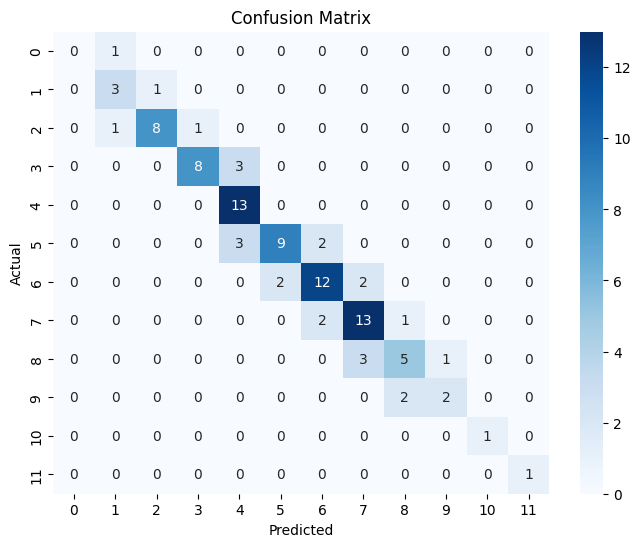

In [12]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_rounded)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Saving Predictions to Output File


In [13]:
# Save Predictions
df.to_csv(predicted_path, index=False)
print(f"Predicted logic depth saved as '{predicted_path}'.")

Predicted logic depth saved as '/content/predicted_path.csv'.
